In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/german_credit.csv')

#### Análisis

Graficaremos algunas variables para analizar el dataset

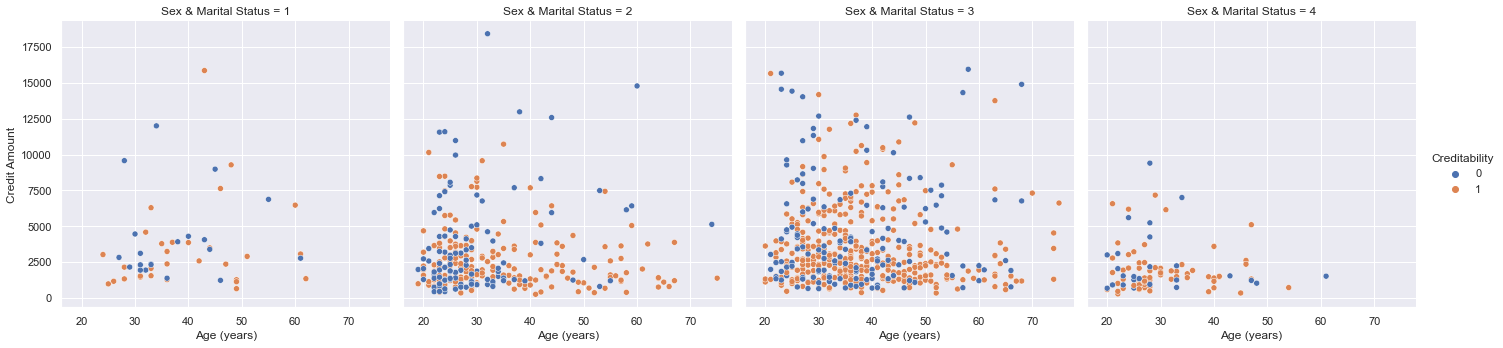

In [3]:
sns.set_theme()

sns.relplot(data=df, x="Age (years)", y="Credit Amount", col="Sex & Marital Status", hue="Creditability")

#### Discretización

Hay tres variables que deben ser discretizadas, y para hacerlo, se tomarán cuatro categorías dividiéndolas de acuerdo a los cuartiles de la variable, para que queden uniformes en cuanto a cantidades.

In [ ]:
df['Duration of Credit (month)'].quantile(q=[0.25, 0.5, 0.75])
df['Credit Amount'].quantile(q=[0.25, 0.5, 0.75])
df['Age (years)'].quantile(q=[0.25, 0.5, 0.75])

def categorize(column, q1, q2, q3):
    df.loc[df[column] < q1, column] = 0
    df.loc[(df[column] >=q1) & (df[column] <q2), column] = 1
    df.loc[(df[column] >=q2) & (df[column] <q3), column] = 2
    df.loc[df[column] >=q3, column] = 4

categorize('Duration of Credit (month)', 12, 18, 24)
categorize('Credit Amount', 1365.5, 2319.5, 3972.25)
categorize('Age (years)', 27, 33, 42)

df.to_csv('../data/german_credit_proc.csv', index=False)